In [1]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# importowanie csv do ramki danych
heartAttack = pd.read_csv(os.getcwd() + '\dataSets' + '\heart.csv')
heartAttack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# analiza danych statystycznych
print(heartAttack.describe())
print(heartAttack.info())
print(heartAttack.isnull().values.any())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

<AxesSubplot:>

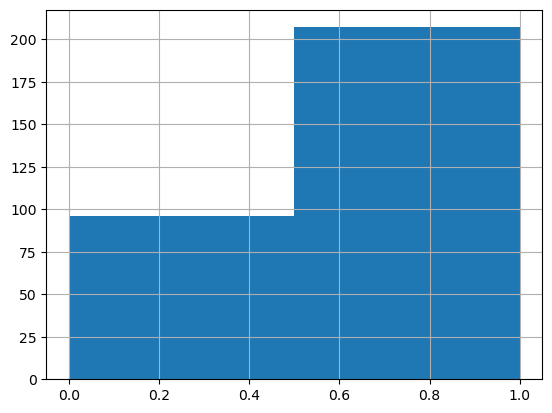

In [3]:
# rozkład płci
heartAttack['sex'].hist(bins=2) 

<AxesSubplot:>

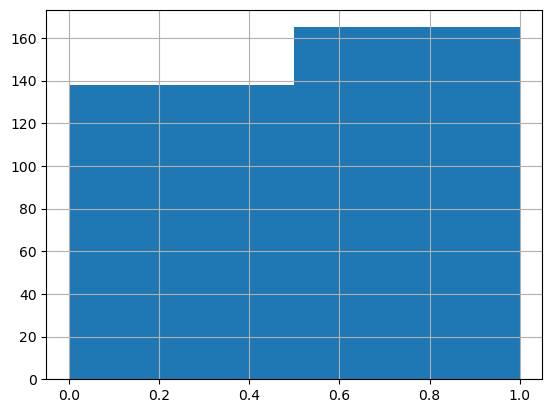

In [4]:
# rozkład "chance to heart attack"
heartAttack['output'].hist(bins=2) 

<AxesSubplot:>

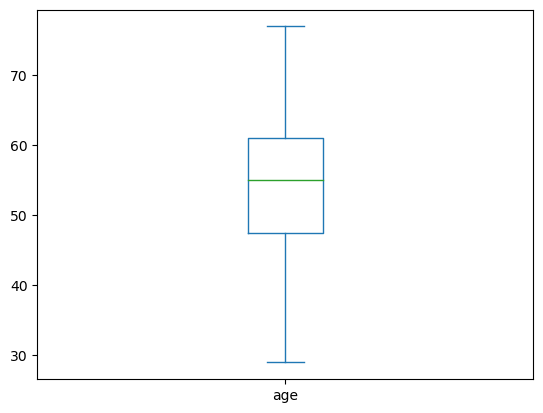

In [5]:
# rozkład danych z uwzglednieniem wieku
heartAttack['age'].plot.box() 

In [6]:
heartAttack.drop(['oldpeak','caa','slp','thall'], axis=1, inplace = True)

heartAttack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,0
301,57,1,0,130,131,0,1,115,1,0


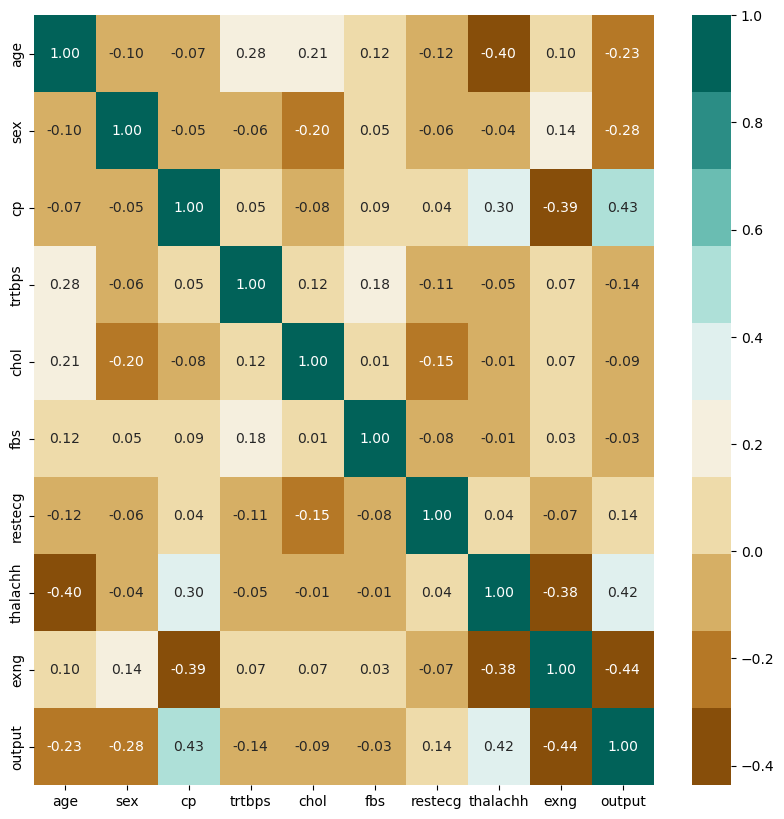

In [7]:
# wyznaczenie macierzy korelacji

correlations = heartAttack.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(heartAttack.columns);

plt.show()


# Age : Age of the patient	
# Sex : Sex of the patient	
# cp : Chest Pain type chest pain type
#   Value 1: typical angina
#   Value 2: atypical angina
#   Value 3: non-anginal pain
#   Value 4: asymptomatic 	
# trtbps : resting blood pressure (in mm Hg)
# chol : cholestoral in mg/dl fetched via BMI sensor
# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# rest_ecg : resting electrocardiographic results
#   Value 0: normal
#   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# output: 0= less chance of heart attack 1= more chance of heart attack

In [8]:
# uzupełnienie pustych wartości
heartAttack.fillna(heartAttack.mean(), inplace=True)
heartAttackCopy = heartAttack.copy()

In [9]:
# wymieszanie danych przed podziałem na zbiory 
heartAttack = heartAttack.sample(frac=1)

In [10]:
# zbiór danych
X = heartAttack.drop('output', axis=1).to_numpy()
X

array([[ 51,   0,   2, ...,   0, 157,   0],
       [ 58,   1,   0, ...,   0, 131,   1],
       [ 53,   1,   0, ...,   1,  95,   1],
       ...,
       [ 56,   1,   0, ...,   0, 144,   1],
       [ 44,   1,   0, ...,   1, 144,   1],
       [ 59,   1,   3, ...,   0, 125,   0]], dtype=int64)

In [11]:
# zbiór etykiet
y = heartAttack.loc[:, 'output'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [12]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [13]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [14]:
# MODEL 1 - regresja logistyczna 
heartAttacklogisticRegresion = linear_model.LogisticRegression()
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.7, 0.7, 0.7, 0.7049180327868853]


c:\Users\adamw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.5, 0.75, 0.6, 0.6721311475409836]


In [16]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.6333333333333333, 0.7037037037037037, 0.6666666666666667, 0.6885245901639344]


<AxesSubplot:>

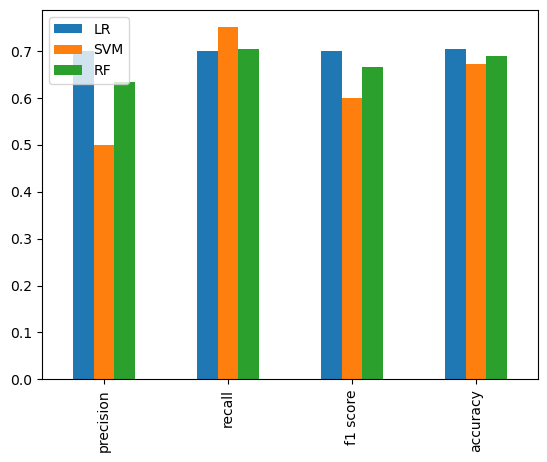

In [17]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [18]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.0, 0.0, 0.0, 0.5081967213114754]


c:\Users\adamw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Logistic Regression
accuracy = train_model(linear_model.LogisticRegression(penalty = 'none'), X_train, y_train, X_test)
accuracy_compare['LR'] = accuracy
print ("LR penalty = l1" , accuracy)

# MODEL 6 - Support Logistic Regression
accuracy = train_model(linear_model.LogisticRegression(class_weight ='balanced', penalty = 'none'), X_train, y_train, X_test)
accuracy_compare['LR'] = accuracy
print ("LR class_weight = balanced" , accuracy)


LR penalty = l1 [0.7, 0.7, 0.7, 0.7049180327868853]
LR class_weight = balanced [0.8, 0.7058823529411765, 0.7500000000000001, 0.7377049180327869]


c:\Users\adamw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adamw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [20]:
import pickle

with open('heartAttack_classifier_model.pickle', 'wb') as handle:
    pickle.dump(heartAttacklogisticRegresion, handle)

In [21]:
heartAttack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
140,51,0,2,120,295,0,0,157,0,1
191,58,1,0,128,216,0,0,131,1,0
262,53,1,0,123,282,0,1,95,1,0
210,57,1,2,128,229,0,0,150,0,0
131,49,0,1,134,271,0,1,162,0,1
...,...,...,...,...,...,...,...,...,...,...
117,56,1,3,120,193,0,0,162,0,1
180,55,1,0,132,353,0,1,132,1,0
214,56,1,0,125,249,1,0,144,1,0
294,44,1,0,120,169,0,1,144,1,0
